In [8]:
# Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Getting the Data

In [9]:
# Import the data
x_df = pd.read_csv('X.csv').drop('Unnamed: 0', axis=1)
y_appetency_df = pd.read_csv('Y_appetency.csv').drop('Unnamed: 0', axis=1)
y_churn_df = pd.read_csv('Y_churn.csv').drop('Unnamed: 0', axis=1)
y_upselling_df = pd.read_csv('Y_upselling.csv').drop('Unnamed: 0', axis=1)

# Cleaning the Data

In [10]:
# Remove columns missing majority of data 
# (i.e. columns containing >50% missing values (>25000))
x_df = x_df.dropna(thresh=25000, axis=1)
x_df.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,xb3V,RAYp,F2FyR07IdsN7I
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,bHR7,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,Qu4f,02N6s8f,ib5G6X1eUxUn6
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,0.0,...,eKej,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,H3p7,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I


In [11]:
# Replace numerical missing values with the mean of observed values
x_df = x_df.fillna(x_df.mean())
x_df.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228
0,1526.000000,7.0,184.0,464.000000,580.0,14.000000,128.0,166.56,0.0,3570.0,...,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,xb3V,RAYp,F2FyR07IdsN7I
1,525.000000,0.0,0.0,168.000000,210.0,2.000000,24.0,353.52,0.0,4764966.0,...,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I
2,5236.000000,7.0,904.0,1212.000000,1515.0,26.000000,816.0,220.08,0.0,5883894.0,...,bHR7,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,Qu4f,02N6s8f,ib5G6X1eUxUn6
3,1326.437116,0.0,0.0,234.518225,0.0,4.507926,0.0,22.08,0.0,0.0,...,eKej,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I
4,1029.000000,7.0,3216.0,64.000000,80.0,4.000000,64.0,200.00,0.0,0.0,...,H3p7,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I


In [12]:
# Replace categorical missing value with its mode
x_df = x_df.fillna(x_df.mode().iloc[0])
x_df.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228
0,1526.000000,7.0,184.0,464.000000,580.0,14.000000,128.0,166.56,0.0,3570.0,...,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,xb3V,RAYp,F2FyR07IdsN7I
1,525.000000,0.0,0.0,168.000000,210.0,2.000000,24.0,353.52,0.0,4764966.0,...,gvA6,cJvF,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I
2,5236.000000,7.0,904.0,1212.000000,1515.0,26.000000,816.0,220.08,0.0,5883894.0,...,bHR7,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,Qu4f,02N6s8f,ib5G6X1eUxUn6
3,1326.437116,0.0,0.0,234.518225,0.0,4.507926,0.0,22.08,0.0,0.0,...,eKej,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I
4,1029.000000,7.0,3216.0,64.000000,80.0,4.000000,64.0,200.00,0.0,0.0,...,H3p7,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I


In [13]:
# We found that keeping all the levels in each category yields the best results. 
# To overcome large number of column from one-hot-encoding, we use LabelEncoder 
# which digitize string variables.

from sklearn.preprocessing import LabelEncoder

object_columns = list(x_df.select_dtypes(include=['object']).columns)
le = preprocessing.LabelEncoder()

for c in object_columns:
    x_df[c] = le.fit_transform(x_df[c])
    
x_df.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228
0,1526.000000,7.0,184.0,464.000000,580.0,14.000000,128.0,166.56,0.0,3570.0,...,12236,1,11,94,4,2964,3,22,2,8
1,525.000000,0.0,0.0,168.000000,210.0,2.000000,24.0,353.52,0.0,4764966.0,...,9781,1,11,10,4,125,0,14,2,8
2,5236.000000,7.0,904.0,1212.000000,1515.0,26.000000,816.0,220.08,0.0,5883894.0,...,8473,0,11,1293,0,1610,3,10,0,25
3,1326.437116,0.0,0.0,234.518225,0.0,4.507926,0.0,22.08,0.0,0.0,...,9161,0,11,1444,4,817,0,7,2,8
4,1029.000000,7.0,3216.0,64.000000,80.0,4.000000,64.0,200.00,0.0,0.0,...,3834,0,11,1731,4,65,0,7,2,8


# Feature/Variable Selection

In [14]:
y_appetency = y_appetency_df.as_matrix().ravel()
y_churn = y_churn_df.as_matrix().ravel()
y_upselling = y_upselling_df.as_matrix().ravel()

In [23]:
# We chose Random Forest for feature selection. RF incorporates variable 
# interactions in calculating features importances but much more efficient 
# than fitting a classifier for Y using pairs of explanatory variables.

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0, n_estimators=50).fit(x_df, y_appetency)

In [24]:
var_names = list(x_df)
var_scores = forest.feature_importances_

var_selection = dict(zip(var_names, var_scores))

from collections import OrderedDict
var_selection = OrderedDict(sorted(var_selection.items(), key=lambda t: t[1]))

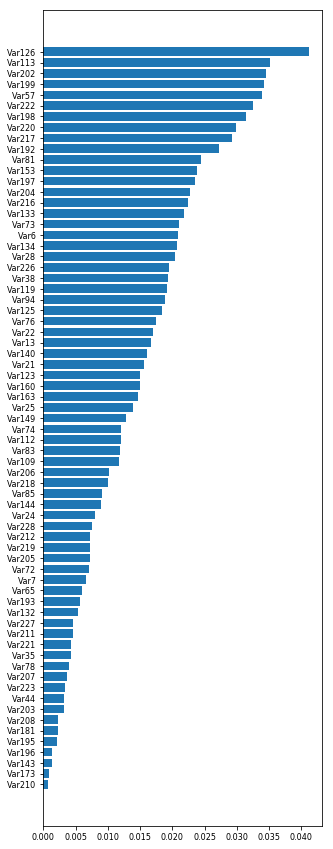

In [25]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(5,15))
plt.barh(range(len(var_selection)), list(var_selection.values()), align='center')
plt.yticks(range(len(var_selection)), list(var_selection.keys()))
plt.show()

In [26]:
# Drop non-significant variables given that large drop in feature 
# importance score from Var192 to Var81, we select the score of 
# 0.025 as the cutoff point.

dropping_vars = []

for key in var_selection:
    if var_selection.get(key) < 0.025:
        dropping_vars.append(key)
        
x_selected_df = x_df.drop(dropping_vars, axis=1)

appetency_vars = list(x_selected_df.columns)

x_selected_df.head()

,Var57,Var113,Var126,Var192,Var198,Var199,Var202,Var217,Var220,Var222
0,4.076907,117625.60,8.00000,225,3302,4015,3682,12236,94,2964
1,5.408032,-356411.60,-0.55388,91,3697,4890,4422,9781,10,125
2,6.599658,405104.00,-28.00000,248,1686,4900,448,8473,1293,1610
3,1.988250,-275703.60,-14.00000,269,2575,362,2953,9161,1444,817
4,4.552446,10714.84,58.00000,131,971,2399,5511,3834,1731,65


In [27]:
# Split the train and test data
x_train, x_test = train_test_split(x_selected_df, 
                test_size=0.20, random_state=0)
y_appetency_train, y_appetency_test = train_test_split(y_appetency_df, 
                test_size=0.20, random_state=0)
y_churn_train, y_churn_test = train_test_split(y_churn_df, 
                test_size=0.20, random_state=0)
y_upselling_train, y_upselling_test = train_test_split(y_upselling_df, 
                test_size=0.20, random_state=0)

# Training the Models

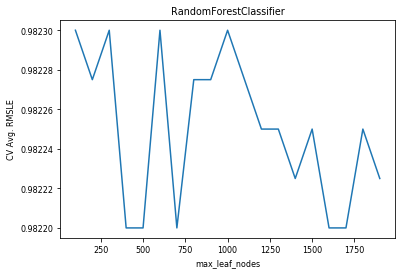

Optimal max_leaf_nodes 100
Accuracy 0.9823


In [39]:
# Tune parameters
from sklearn.ensemble import RandomForestClassifier

PARAM = np.arange(100, 2000, 100)
PARAM_NAME = 'max_leaf_nodes'
param_grid = {PARAM_NAME: PARAM}
grid = GridSearchCV(RandomForestClassifier(n_estimators=20), param_grid, cv = 5)
                .fit(x_train, y_appetency_train.as_matrix().ravel())

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(PARAM, grid.cv_results_['mean_test_score'])
ax.set_xlabel(PARAM_NAME)
ax.set_ylabel('CV Avg. RMSLE')
plt.title("RandomForestClassifier")
plt.show()

print('Optimal', PARAM_NAME, grid.best_params_[PARAM_NAME])
print('Accuracy', max(grid.cv_results_['mean_test_score']))

# Final Evaluation

Accuracy on the test sets

In [36]:
# churn
forest_test = RandomForestClassifier(random_state=0, n_estimators=20)
                .fit(x_train, y_churn_train.as_matrix().ravel())

y_true = y_churn_test
y_pred = forest_test.predict(x_test)
score = accuracy_score(y_true, y_pred)

print('churn: ', score)

churn:  0.9237


In [35]:
# appetency
forest_test = RandomForestClassifier(random_state=0, n_estimators=20)
                .fit(x_train, y_appetency_train.as_matrix().ravel())

y_true = y_appetency_test
y_pred = forest_test.predict(x_test)
score = accuracy_score(y_true, y_pred)

print('appetency: ', score)

appetency:  0.9818


In [37]:
# upselling
forest_test = RandomForestClassifier(random_state=0, n_estimators=20)
                .fit(x_train, y_upselling_train.as_matrix().ravel())

y_true = y_upselling_test
y_pred = forest_test.predict(x_test)
score = accuracy_score(y_true, y_pred)

print('upselling: ', score)

upselling:  0.9392


# Bonus Question

We have already run the the feature/variable selection on apetency so we need to run the feature/variable selection on churn and upselling. We can then use the same methods as before to select all of the variables that we will use.

## Churn

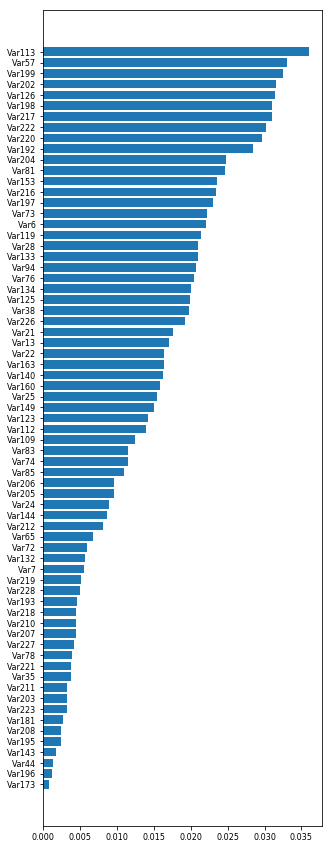

In [28]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0, n_estimators=50).fit(x_df, y_churn)

var_names = list(x_df)
var_scores = forest.feature_importances_

var_selection = dict(zip(var_names, var_scores))

from collections import OrderedDict
var_selection = OrderedDict(sorted(var_selection.items(), key=lambda t: t[1]))

plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(5,15))
plt.barh(range(len(var_selection)), list(var_selection.values()), align='center')
plt.yticks(range(len(var_selection)), list(var_selection.keys()))
plt.show()

In [29]:
# Drop non-significant variables given that large drop in feature 
# importance score from Var192 to Var81, we select the score of 
# 0.025 as the cutoff point.

dropping_vars = []

for key in var_selection:
    if var_selection.get(key) < 0.025:
        dropping_vars.append(key)
        
x_selected_df = x_df.drop(dropping_vars, axis=1)

churn_vars = list(x_selected_df.columns)

x_selected_df.head()

,Var57,Var113,Var126,Var192,Var198,Var199,Var202,Var217,Var220,Var222
0,4.076907,117625.60,8.00000,225,3302,4015,3682,12236,94,2964
1,5.408032,-356411.60,-0.55388,91,3697,4890,4422,9781,10,125
2,6.599658,405104.00,-28.00000,248,1686,4900,448,8473,1293,1610
3,1.988250,-275703.60,-14.00000,269,2575,362,2953,9161,1444,817
4,4.552446,10714.84,58.00000,131,971,2399,5511,3834,1731,65


## Upselling

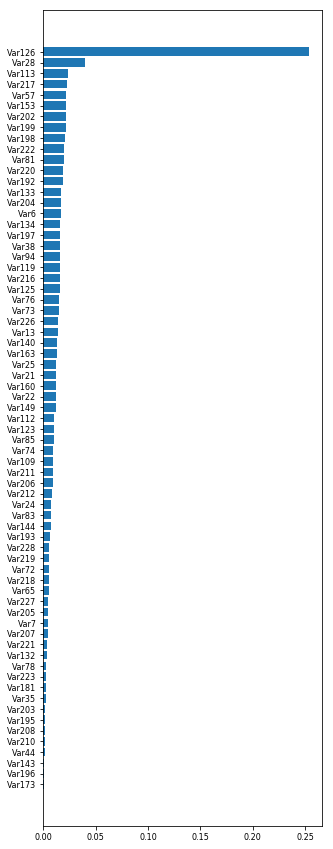

In [30]:
forest = RandomForestClassifier(random_state=0, n_estimators=50).fit(x_df, y_upselling)

var_names = list(x_df)
var_scores = forest.feature_importances_

var_selection = dict(zip(var_names, var_scores))

from collections import OrderedDict
var_selection = OrderedDict(sorted(var_selection.items(), key=lambda t: t[1]))

plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(5,15))
plt.barh(range(len(var_selection)), list(var_selection.values()), align='center')
plt.yticks(range(len(var_selection)), list(var_selection.keys()))
plt.show()

In [31]:
# Drop non-significant variables given that large drop in feature 
# importance score from Var192 to Var81, we select the score of 
# 0.025 as the cutoff point.

dropping_vars = []

for key in var_selection:
    if var_selection.get(key) < 0.025:
        dropping_vars.append(key)
        
x_selected_df = x_df.drop(dropping_vars, axis=1)

upselling_vars = list(x_selected_df.columns)

x_selected_df.head()

,Var28,Var126
0,166.56,8.00000
1,353.52,-0.55388
2,220.08,-28.00000
3,22.08,-14.00000
4,200.00,58.00000


## Combining the selected features and testing the model again

In [39]:
# selected variables to use
variables = list(set(appetency_vars + churn_vars + upselling_vars))
all_variables = list(x_df.columns)

dropping_vars = []
for v in all_variables:
    if v not in variables:
        dropping_vars.append(v)
        
x_selected_df = x_df.drop(dropping_vars, axis=1)

# Split the train and test data
x_train, x_test = train_test_split(x_selected_df, 
                test_size=0.20, random_state=0)
y_appetency_train, y_appetency_test = train_test_split(y_appetency_df, 
                test_size=0.20, random_state=0)
y_churn_train, y_churn_test = train_test_split(y_churn_df, 
                test_size=0.20, random_state=0)
y_upselling_train, y_upselling_test = train_test_split(y_upselling_df, 
                test_size=0.20, random_state=0)

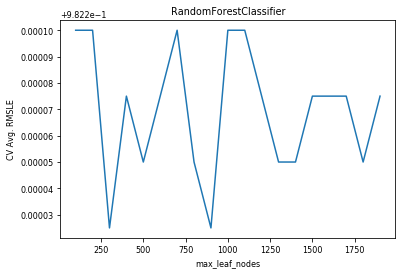

Optimal max_leaf_nodes 100
Accuracy 0.9823


In [42]:
PARAM = np.arange(100, 2000, 100)
PARAM_NAME = 'max_leaf_nodes'
param_grid = {PARAM_NAME: PARAM}
grid = GridSearchCV(RandomForestClassifier(n_estimators=20), param_grid, cv = 5).fit(x_train, y_appetency_train.as_matrix().ravel())

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(PARAM, grid.cv_results_['mean_test_score'])
ax.set_xlabel(PARAM_NAME)
ax.set_ylabel('CV Avg. RMSLE')
plt.title("RandomForestClassifier")
plt.show()

print('Optimal', PARAM_NAME, grid.best_params_[PARAM_NAME])
print('Accuracy', max(grid.cv_results_['mean_test_score']))

## Now testing on test set

In [44]:
# churn
forest_test = RandomForestClassifier(random_state=0, n_estimators=20).fit(x_train, y_churn_train.as_matrix().ravel())

y_true = y_churn_test
y_pred = forest_test.predict(x_test)
score = accuracy_score(y_true, y_pred)

print('churn: ', score)

churn:  0.9242


In [45]:
# appetency
forest_test = RandomForestClassifier(random_state=0, n_estimators=20).fit(x_train, y_appetency_train.as_matrix().ravel())

y_true = y_appetency_test
y_pred = forest_test.predict(x_test)
score = accuracy_score(y_true, y_pred)

print('appetency: ', score)

appetency:  0.9818


In [46]:
# upselling
forest_test = RandomForestClassifier(random_state=0, n_estimators=20).fit(x_train, y_upselling_train.as_matrix().ravel())

y_true = y_upselling_test
y_pred = forest_test.predict(x_test)
score = accuracy_score(y_true, y_pred)

print('upselling: ', score)

upselling:  0.9541


## Results from using combined feature selection

In sample accuracy of combined features vs single features: 0.9823 vs 0.9823

Out of sample accuracy of combined vs single:

Churn: 0.9242 vs 0.9237

Appetency: 0.9818 vs 0.9818

Upselling: 0.9541 vs 0.9392

It looks like our results did not improve the in sample accuracy for appetency or the out of sample accuracy for appentency but it did marginally improve the accuracy of churn and upselling.